Name: Aniruddha Ojha Roll No: BEBD22602 Div B

The Randomized Benchmarking Protocol.

In [2]:
!pip install cirq

  Using cached proto_plus-1.26.1-py3-none-any.whl.metadata (2.2 kB)
INFO: pip is looking at multiple versions of grpcio-status to determine which version is compatible with other requirements. This could take a while.
  Using cached grpcio_status-1.75.1-py3-none-any.whl.metadata (1.1 kB)
  Using cached grpcio_status-1.75.0-py3-none-any.whl.metadata (1.1 kB)
  Using cached grpcio_status-1.74.0-py3-none-any.whl.metadata (1.1 kB)
  Using cached grpcio_status-1.73.1-py3-none-any.whl.metadata (1.1 kB)
  Using cached grpcio_status-1.73.0-py3-none-any.whl.metadata (1.1 kB)
  Using cached grpcio_status-1.72.2-py3-none-any.whl.metadata (1.1 kB)
  Using cached grpcio_status-1.72.1-py3-none-any.whl.metadata (1.1 kB)
INFO: pip is still looking at multiple versions of grpcio-status to determine which version is compatible with other requirements. This could take a while.
  Using cached grpcio_status-1.71.2-py3-none-any.whl.metadata (1.1 kB)
   ---------------------------------------- 0.0/2.0 MB ? e

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.12.0 requires gast<=0.4.0,>=0.2.1, but you have gast 0.6.0 which is incompatible.
tensorflow-intel 2.12.0 requires keras<2.13,>=2.12.0, but you have keras 3.9.2 which is incompatible.
tensorflow-intel 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 2.1.3 which is incompatible.
tensorflow-intel 2.12.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 5.28.3 which is incompatible.
tensorflow-intel 2.12.0 requires tensorboard<2.13,>=2.12, but you have tensorboard 2.19.0 which is incompatible.
tensorflow-intel 2.12.0 requires wrapt<1.15,>=1.11.0, but you have wrapt 1.17.2 which is incompatible.


In [3]:
# Import required libraries
import cirq
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Define a single qubit
qubit = cirq.LineQubit(0)

In [5]:
# Function to generate a random Clifford gate
def random_clifford():
    return np.random.choice([cirq.X, cirq.Y, cirq.Z, cirq.H, cirq.S, cirq.I])

In [6]:
# Function to create a randomized benchmarking sequence
def rb_sequence(length):
    circuit = cirq.Circuit()
    for _ in range(length):
        gate = random_clifford()(qubit)
        circuit.append(gate)
    # Add the inverse of all gates to ideally return to |0>
    inverse = cirq.inverse(circuit)
    circuit.append(inverse)
    circuit.append(cirq.measure(qubit, key='m'))
    return circuit


In [7]:
# Parameters
sequence_lengths = [1, 2, 4, 8, 16, 32]  # RB sequence lengths
shots = 1024
fidelities = []

In [8]:
# Simulator
simulator = cirq.Simulator()

In [9]:
# Run RB sequences
for L in sequence_lengths:
    circuit = rb_sequence(L)
    result = simulator.run(circuit, repetitions=shots)
    counts = result.histogram(key='m')
    fidelity = counts.get(0, 0) / shots  # Probability of returning to |0>
    fidelities.append(fidelity)

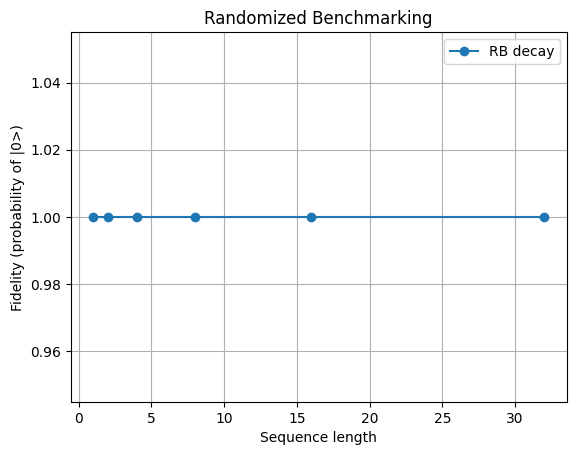

In [10]:
# Plot the decay
plt.plot(sequence_lengths, fidelities, 'o-', label='RB decay')
plt.xlabel('Sequence length')
plt.ylabel('Fidelity (probability of |0>)')
plt.title('Randomized Benchmarking')
plt.grid(True)
plt.legend()
plt.show()